## The Sparks Foundation
### Data Science and Business Analytics: Task #4
### Problem statement: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines


In [ ]:
"""
importing required libraries
"""
import pandas as pd
import re
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pmdarima as pm
import nltk
from textblob import TextBlob
from matplotlib.pyplot import figure
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

## Data Collection

In [ ]:
"""
loading news
"""
News=pd.read_csv("/home/suzi/Downloads/archive/Combined_News_DJIA.csv")

In [ ]:
News.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [ ]:
"""
loading stock values
"""
Stock=pd.read_csv("/home/suzi/Downloads/archive/upload_DJIA_table.csv")

In [ ]:
Stock.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [ ]:
"""
Lets combine all the top 25 news together
"""
headlines = []
for row in range(0,len(News.index)):
    headlines.append(' '.join(str(x) for x in News.iloc[row,2:27]))

In [ ]:
headlines[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

## Data Cleaning

In [ ]:
"""
cleaning the combined news
"""
clean_headlines = []
for i in range(0, len(headlines)):
  clean_headlines.append(re.sub("b[(')]+", '', headlines[i] ))
  clean_headlines[i] = re.sub('b[(")]+', '', clean_headlines[i] )
  clean_headlines[i] = re.sub("\'", '', clean_headlines[i] )

In [ ]:
clean_headlines[0]

'Georgia downs two Russian warplanes as countries move to brink of war" BREAKING: Musharraf to be impeached. Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube) Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire Afghan children raped with impunity, U.N. official says - this is sick, a three year old was raped and they do nothing" 150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets. Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SOs side" The enemy combatent trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO] Did the U.S. Prep Georgia for War with Russia? Rice Gives Green Light for Israel to Attack Iran: S

In [ ]:
"""
adding combined news to the dataframe
"""
News['Combined_News'] = clean_headlines

In [ ]:
News.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Combined_News
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",Georgia downs two Russian warplanes as countri...
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",Why wont America and Nato help us? If they won...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",Remember that adorable 9-year-old who sang at ...
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,U.S. refuses Israel weapons to attack Iran: r...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P

In [ ]:
print(News.columns)

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'Combined_News'],
      dtype='object')


In [ ]:
"""
checking for Null values
"""
News.isnull().sum()

Date             0
Label            0
Top1             0
Top2             0
Top3             0
Top4             0
Top5             0
Top6             0
Top7             0
Top8             0
Top9             0
Top10            0
Top11            0
Top12            0
Top13            0
Top14            0
Top15            0
Top16            0
Top17            0
Top18            0
Top19            0
Top20            0
Top21            0
Top22            0
Top23            1
Top24            3
Top25            3
Combined_News    0
dtype: int64

In [ ]:
all_headlines = ' '.join(News['Combined_News'].str.lower())

In [ ]:
"""
removing stopwords
"""
stopwords = STOPWORDS
stopwords.add('will')

wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=500).generate(all_headlines)

## Data Visualization

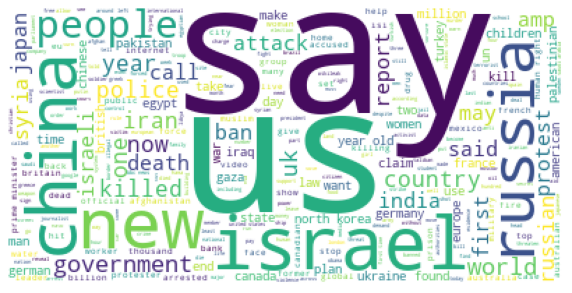

In [ ]:
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

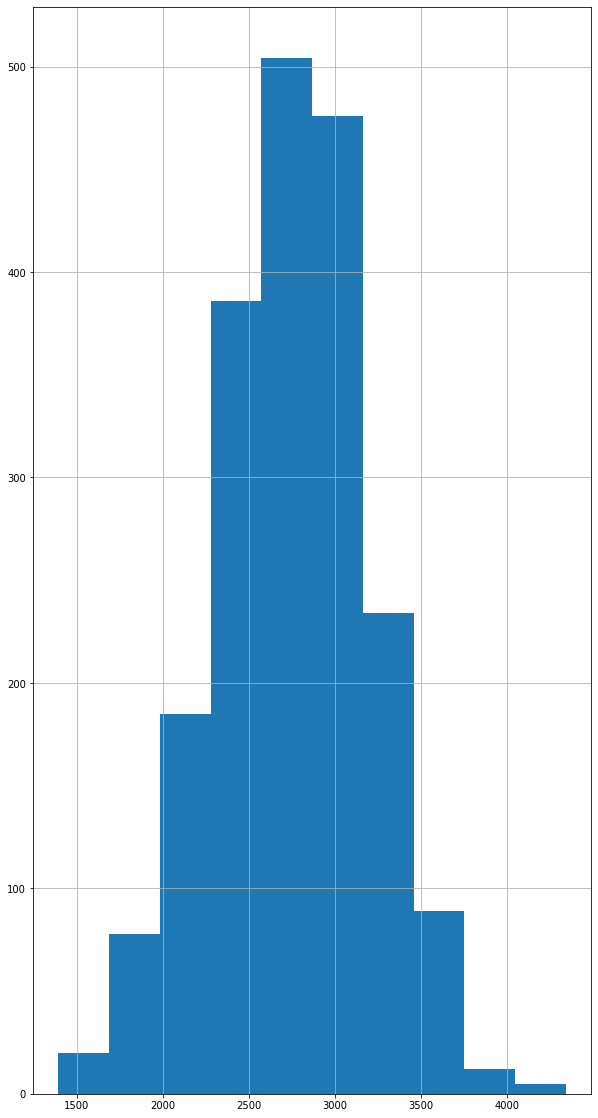

<Figure size 432x288 with 0 Axes>

In [ ]:
News['Combined_News'].str.len().hist()
plt.figure(figsize=(6,4))
plt.show()

In [ ]:
Stock.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [ ]:
Stock.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


In [ ]:
Stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


In [ ]:
Stock.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

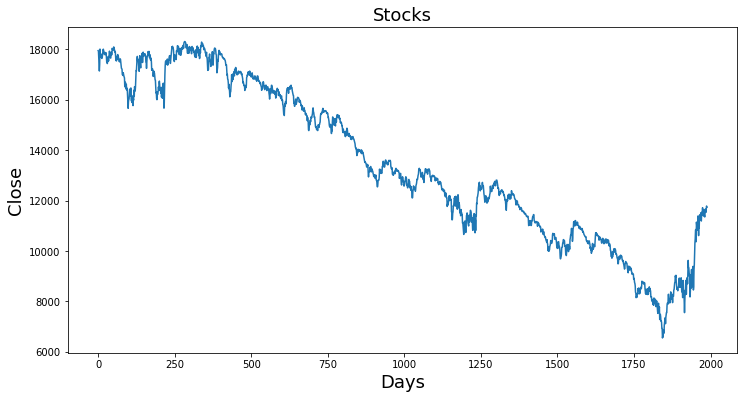

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Stocks', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close', fontsize = 18)
plt.plot(Stock['Close'])
plt.show()

In [ ]:
"""
filling 0 to the null values
"""
Stock.fillna(0,inplace=True)

In [ ]:
Stock.shape

(1989, 7)

In [ ]:
"""
Splitting data into train and valid
"""
train = Stock[:700]
valid = Stock[700:]

In [ ]:
train.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [ ]:
training = train['Close']
validation = valid['Close']

In [ ]:
training.head()

0    17949.369141
1    17929.990234
2    17694.679688
3    17409.720703
4    17140.240234
Name: Close, dtype: float64

##**Training model**



In [ ]:
model = pm.auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=6.41 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=9241.082, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=9029.079, Time=1.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.00 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=9242.013, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=8948.956, Time=2.81 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=14.32 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=4.68 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=8947.126, Time=0.84 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=9027.093, Time=0.75 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=9.29 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=3.24 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=8948.953, Time=3.08 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=19.93 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=8949.081,

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

## Prediction

In [ ]:
forecast = model.predict(n_periods=1289)

In [ ]:
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

In [ ]:
forecast.head()

,Prediction
700,15382.232704
701,15387.290682
702,15390.660560
703,15392.365055
704,15391.969004


In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

4197.027326858622

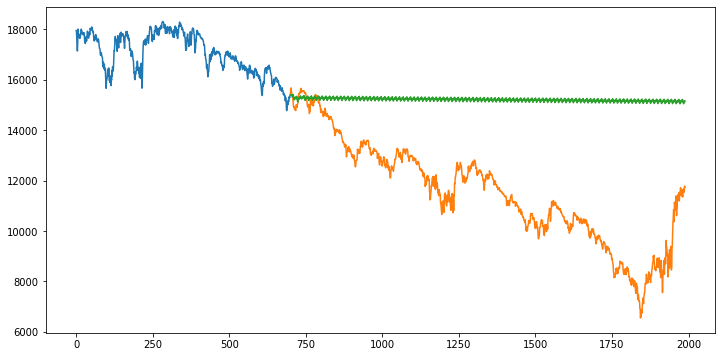

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

In [ ]:
"""
Merging the data set on the date field
"""
merge_data = News.merge(Stock, how='inner', on='Date', left_index = True)
merge_data.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,Combined_News,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",Georgia downs two Russian warplanes as countri...,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",Why wont America and Nato help us? If they won...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",Remember that adorable 9-year-old who sang at ...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727


In [ ]:
"""
filling 0 to the null values
"""
merge_data.fillna(0, inplace=True)  

"""
Resting index after merge
"""
merge_data.reset_index(inplace = True,drop=True)
merge_data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,Combined_News,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",Georgia downs two Russian warplanes as countri...,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",Why wont America and Nato help us? If they won...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",Remember that adorable 9-year-old who sang at ...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,U.S. refuses Israel weapons to attack Iran: r...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,All the experts admit that we should legalise ...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [ ]:
"""
returns subjectivity of news
"""
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

"""
returns polarity of news
"""
def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [ ]:
merge_data['Subjectivity'] =merge_data['Combined_News'].apply(getSubjectivity)
merge_data['Polarity'] =merge_data['Combined_News'].apply(getPolarity)

In [ ]:
"""
returns sentiment of news
"""
def getSIA(text):
  sia = SentimentIntensityAnalyzer()
  sentiment = sia.polarity_scores(text)
  return sentiment

In [ ]:
"""
Getting the sentiment scores for each day
"""
compound = []
neg = []
neu = []
pos = []
SIA = 0
for i in range(0, len(merge_data['Combined_News'])):
  SIA = getSIA(merge_data['Combined_News'][i])
  compound.append(SIA['compound'])
  neg.append(SIA['neg'])
  neu.append(SIA['neu'])
  pos.append(SIA['pos'])

In [ ]:
merge_data['Compound'] =compound
merge_data['Negative'] =neg
merge_data['Neutral'] =neu
merge_data['Positive'] = pos

In [ ]:
merge_data.shape

(1989, 40)

In [ ]:
merge_data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Low,Close,Volume,Adj Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,11388.040039,11734.320312,212830000,11734.320312,0.267549,-0.048568,-0.9982,0.235,0.724,0.041
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,11675.530273,11782.349609,183190000,11782.349609,0.374806,0.121956,-0.9858,0.191,0.721,0.089
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,11601.519531,11642.469727,173590000,11642.469727,0.536234,-0.044302,-0.9715,0.128,0.816,0.056
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,11453.339844,11532.959961,182550000,11532.959961,0.364021,0.011398,-0.9809,0.146,0.788,0.066
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,11450.889648,11615.929688,159790000,11615.929688,0.375099,0.040677,-0.9882,0.189,0.717,0.094


## Visualizing polarity

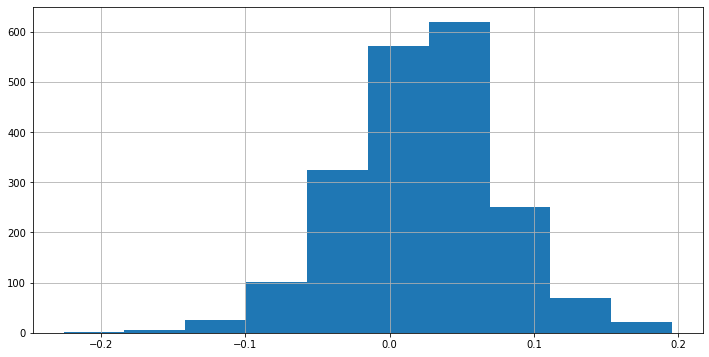

In [ ]:
plt.figure(figsize=(12,6))
merge_data['Polarity'].hist()
plt.show()

## Visualizing Subjectivity

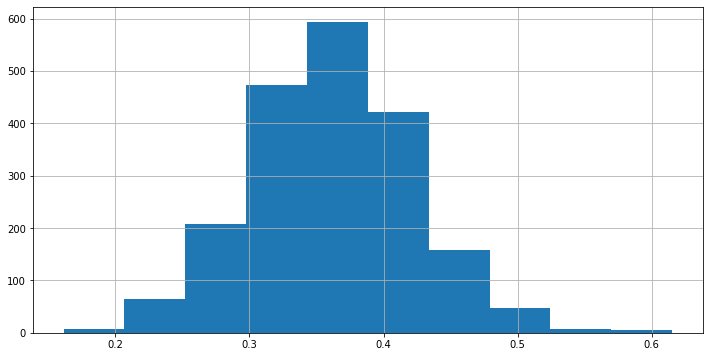

In [ ]:
plt.figure(figsize=(12,6))
merge_data['Subjectivity'].hist()
plt.show()

In [ ]:
keep_columns = [ 'Open',  'High', 'Low','Volume', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive','Label']
df = merge_data[keep_columns]
df.head()

,Open,High,Low,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Label
0,11432.089844,11759.959961,11388.040039,212830000,0.267549,-0.048568,-0.9982,0.235,0.724,0.041,0
1,11729.669922,11867.110352,11675.530273,183190000,0.374806,0.121956,-0.9858,0.191,0.721,0.089,1
2,11781.700195,11782.349609,11601.519531,173590000,0.536234,-0.044302,-0.9715,0.128,0.816,0.056,0
3,11632.809570,11633.780273,11453.339844,182550000,0.364021,0.011398,-0.9809,0.146,0.788,0.066,0
4,11532.070312,11718.280273,11450.889648,159790000,0.375099,0.040677,-0.9882,0.189,0.717,0.094,1


##**Splitting data into train and test**


In [ ]:
"""
Create the feature data set
"""
X =df.drop('Label', axis=1)
y =df['Label']

In [ ]:
y.value_counts()

1    1065
0     924
Name: Label, dtype: int64

In [ ]:
X.shape

(1989, 10)

In [ ]:
y.shape

(1989,)

In [ ]:
X.head()

,Open,High,Low,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,11432.089844,11759.959961,11388.040039,212830000,0.267549,-0.048568,-0.9982,0.235,0.724,0.041
1,11729.669922,11867.110352,11675.530273,183190000,0.374806,0.121956,-0.9858,0.191,0.721,0.089
2,11781.700195,11782.349609,11601.519531,173590000,0.536234,-0.044302,-0.9715,0.128,0.816,0.056
3,11632.809570,11633.780273,11453.339844,182550000,0.364021,0.011398,-0.9809,0.146,0.788,0.066
4,11532.070312,11718.280273,11450.889648,159790000,0.375099,0.040677,-0.9882,0.189,0.717,0.094


In [ ]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Label, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0,stratify=y)

## SVM Model

In [ ]:
svclassifier = SVC(kernel='poly',degree=3,class_weight='balanced')
svclassifier.fit(x_train, y_train)

SVC(class_weight='balanced', kernel='poly')

In [ ]:
y_pred = svclassifier.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[  3 182]
 [  4 209]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.02      0.03       185
           1       0.53      0.98      0.69       213

    accuracy                           0.53       398
   macro avg       0.48      0.50      0.36       398
weighted avg       0.49      0.53      0.38       398



## Linear Discriminant Analysis

In [ ]:
model = LinearDiscriminantAnalysis().fit(x_train, y_train)

In [ ]:
predictions = model.predict(x_test)
predictions

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,

In [ ]:
print( classification_report(y_test, predictions) )

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       185
           1       0.86      0.85      0.86       213

    accuracy                           0.85       398
   macro avg       0.85      0.85      0.85       398
weighted avg       0.85      0.85      0.85       398



## Decision Tree

In [ ]:
tree = DecisionTreeClassifier().fit(x_train, y_train)

In [ ]:
tree = DecisionTreeClassifier().fit(x_train, y_train)

In [ ]:
print( tree.score(x_test, y_test))

0.5452261306532663


In [ ]:
tree_prediction = tree.predict(x_test)
print( tree_prediction )

[0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1
 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1
 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0
 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1
 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1
 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1
 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1
 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0
 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1
 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1
 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0]


In [ ]:
y_test

972     0
1013    0
1921    1
402     1
256     0
       ..
1096    0
187     0
1254    1
1308    1
1311    0
Name: Label, Length: 398, dtype: int64

In [ ]:
print( classification_report(y_test, tree_prediction) )

              precision    recall  f1-score   support

           0       0.51      0.48      0.50       185
           1       0.57      0.60      0.59       213

    accuracy                           0.55       398
   macro avg       0.54      0.54      0.54       398
weighted avg       0.54      0.55      0.54       398



## Accuracy:
### SVM: 49%
### LDA: 85%
### Decision Tree: 54%